In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [63]:
df = pd.read_csv('customer_churn_dataset.csv')
df

,customer_id,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
0,285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
1,f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
2,09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
3,11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
4,a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9e8b318d96caa9c0c4a50e8e59f5026c,Kartu B,1634.33,12085.33,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1,490,1
9996,a310627191bdbded3905ac73e77fe319,Kartu B,30000.33,45170.67,0.0,0.0,0.00,0.0,20001.0,0.0,0.0,0.0,1,3120,1
9997,b6f11059e5c1df69b8c16d5c39af23dc,Kartu B,3333.33,13338.67,0.0,0.0,872.00,0.0,0.0,0.0,0.0,0.0,1,483,1
9998,88709f1defd232243f729912be696f87,Kartu B,25000.00,33333.33,0.0,0.0,23497.33,0.0,0.0,0.0,0.0,0.0,15,786,1


<h2>Preprocessing Data</h2>
Library ML umumnya hanya bisa memproses data numerik. karena hal itu, kita perlu mengubah kolom bernilai kategorik menjadi nilai numerik.
pada klom product nilai atribut
    kartu a menjadi 0
    kartu b menjadi 1
    kartu c menjadi 2

In [47]:
df['product'] = df['product'].map({'Kartu A' : 0, 'Kartu B' : 1, 'Kartu C' : 2})
df.head()

,customer_id,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
0,285fae8412c4720a0c79d95f98434422,0,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
1,f45bce87ca6bf100f222fcc0db06b624,0,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
2,09b54557b1e2a10d998e3473a9ccd2a0,0,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
3,11f252f48be36f93dd429f2ec86cb2f5,0,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
4,a8df29ae9195eea348d2f74c967b978d,0,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0


In [58]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

<h2>Normalisasi Data</h2>
KNN merupakan metode yang didasarkan pada tingkat kedekatan antar-atribut.
oleh karena itu, sangat disarankan untuk melakukan normalisasi data agar perhitungan jarak menjadi lebih valid.

In [59]:
scaler = StandardScaler()
scaler = scaler.fit(x)
x = scaler.transform(x)

print(x)


[[-2.74633519 -0.06533577 -0.10928982 ... -0.10382853  1.09574842
  -0.40182793]
 [-2.74633519 -0.06910676 -0.10051651 ...  0.41095635  0.78711732
  -0.64273207]
 [-2.74633519  0.12440994  0.06632798 ...  0.0304047   1.09574842
   0.2862261 ]
 ...
 [-1.10917561 -0.13604637 -0.15468454 ... -0.19349668 -1.06466927
  -0.56830178]
 [-1.10917561 -0.07325939 -0.07248941 ... -0.19349668  1.09574842
  -0.39614623]
 [ 0.52798396 -0.1457059  -0.16395316 ... -0.19349668 -1.06466927
  -0.71659419]]


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
print('Train Set', x_train.shape, y_train.shape)
print('Train Set', x_test.shape, y_test.shape)

Train Set (8000, 13) (8000,)
Train Set (2000, 13) (2000,)


<h2>Modeling</h2>
tentukan nilai k=7

In [70]:
k=2
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

<h3>Predicting<h/3>

In [71]:
y_pred = model.predict(x_test)
print(y_pred)

print("Train set accuracy :", metrics.accuracy_score(y_train, model.predict(x_train)))
print("Test set accuracy :", metrics.accuracy_score(y_test, y_pred))

[0 0 0 ... 0 0 0]
Train set accuracy : 0.935875
Test set accuracy : 0.9225


<h3>Prediksi Data Baru</h3>

In [73]:
product = int(input('input Product :'))
reload_1 = float(input('Input Reload 1 :'))
reload_2 = float(input('Input Reload 2 :'))
video = float(input('Input Video :'))
music = float(input('Input Music :'))
games = float(input('Input Games :'))
chat_1 = float(input('Input Chat 1 :'))
chat_2 = float(input('Input Chat 2 :'))
socmed_1 = float(input('Input Socmed 1 :'))
socmed_2 = float(input('Input Socmed 2 :'))
internet = float(input('Input Internet :'))
daysActive = int(input('Input Day Active :'))
tenure = float(input('input Tenure :'))

new_data = [[product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,daysActive,tenure]]

hasilPrediksi = model.predict(new_data)

if hasilPrediksi == 0 :
    print('\n /customer diprediksi tidak berhenti berlangganan (tetap aktif)')
elif hasilPrediksi==1 :
    print('Customer diprediksi berhenti berlangganan')


 /customer diprediksi tidak berhenti berlangganan (tetap aktif)


<h3>Mencari Nilai K Terbaik</h3>
perfomra k-nn bergantung dengan nilai k

In [74]:
ks = 11
accuracies = []
precisions = []
recalls = []

for k in range(1,ks):
    knn = KNeighborsClassifier(n_neighbors=k)

    #training model
    knn.fit(x_train,y_train)

    #membuat prediksi dari testing data
    y_hat = knn.predict(x_test)

    #menyimpan hasil pengujian
    accuracies.append(metrics.accuracy_score(y_test, y_hat))
    precisions.append(metrics.precision_score(y_test, y_hat))
    recalls.append(metrics.recall_score(y_test, y_hat))

    #cetak hasil pengujian
    print('k =',k)
    print('Accurasi :', metrics.accuracy_score(y_test,y_hat))
    print('Precision :', metrics.precision_score(y_test,y_hat))
    print('Recall :', metrics.recall_score(y_test,y_hat))

k = 1
Accurasi : 0.9255
Precision : 0.8216216216216217
Recall : 0.7855297157622739
k = 2
Accurasi : 0.9215
Precision : 0.8885135135135135
Recall : 0.6795865633074936
k = 3
Accurasi : 0.924
Precision : 0.836676217765043
Recall : 0.7545219638242894
k = 4
Accurasi : 0.9195
Precision : 0.8741721854304636
Recall : 0.6821705426356589
k = 5
Accurasi : 0.9225
Precision : 0.8625
Recall : 0.7131782945736435
k = 6
Accurasi : 0.9235
Precision : 0.9006849315068494
Recall : 0.6795865633074936
k = 7
Accurasi : 0.9225
Precision : 0.8670886075949367
Recall : 0.7080103359173127
k = 8
Accurasi : 0.9165
Precision : 0.8846153846153846
Recall : 0.6537467700258398
k = 9
Accurasi : 0.916
Precision : 0.8662207357859532
Recall : 0.6692506459948321
k = 10
Accurasi : 0.913
Precision : 0.8790035587188612
Recall : 0.6382428940568475


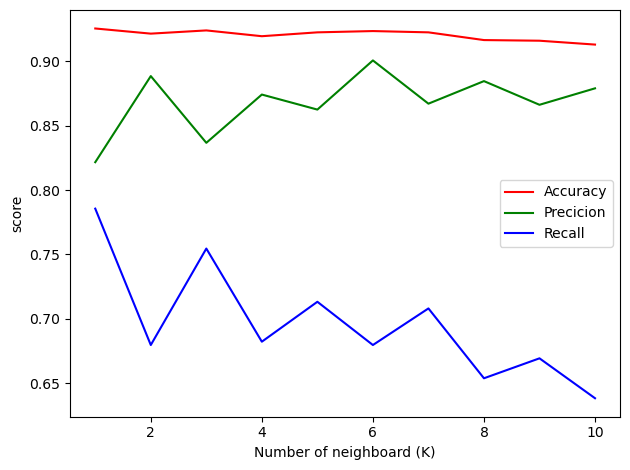

In [75]:
#Line chart
plt.plot(range(1,ks),accuracies,'r')
plt.plot(range(1,ks),precisions, 'g')
plt.plot(range(1,ks),recalls, 'b')

plt.legend(('Accuracy','Precicion', 'Recall'))
plt.ylabel('score')
plt.xlabel('Number of neighboard (K)')
plt.tight_layout()

In [77]:
maxAccuracy = max(accuracies)
maxPrecicion = max(precisions)
maxRecall = max(recalls)

print('Akurasi Terbaik adalah', maxAccuracy, 'dengan k :',accuracies.index(maxAccuracy)+1)
print('Precision Terbaik adalah', maxPrecicion, 'dengan k :',precisions.index(maxPrecicion)+1)
print('Recall Terbaik adalah', maxRecall, 'dengan k :',recalls.index(maxRecall)+1)

Akurasi Terbaik adalah 0.9255 dengan k : 1
Precision Terbaik adalah 0.9006849315068494 dengan k : 6
Recall Terbaik adalah 0.7855297157622739 dengan k : 1
